# Vorticies and Rotational Flow

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Setting up non-rotational vortex

In [2]:
N = 50
x_start,x_end,y_start,y_end = -2.0,2.0,-1.0,1.0
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

\begin{equation}u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}\end{equation}

\begin{equation}\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)\end{equation}

In [3]:
gamma = 5.0 #strength of vortex 
x_vortex,y_vortex = 0.0,0.0

def vel_profile(gamma,x,y,X,Y):
    
    u = gamma/(2*np.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    v = -gamma/(2*np.pi)*(X-x)/((X-x)**2+(Y-y)**2)
    
    return u,v

def streamfunc(gamma,x,y,X,Y):
    
    psi = gamma/(4*np.pi)*np.log((X-x)**2+(Y-y)**2)
    
    return psi

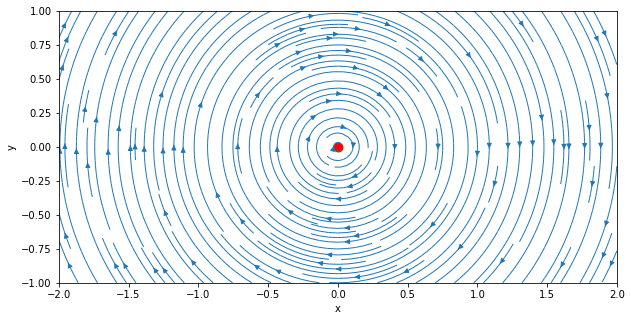

In [4]:
u_vortex,v_vortex = vel_profile(gamma,x_vortex,y_vortex,X,Y)
psi_vortex = streamfunc(gamma,x_vortex,y_vortex,X,Y)

width = 10
height = (y_end-y_start)/(x_end-x_start)*width

plt.figure(figsize = (width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u_vortex,v_vortex,density=2,linewidth=1)
plt.scatter(x_vortex,y_vortex,s=80,color='r')

### Add a sink

In [12]:
sigma = -1.0
x_sink,y_sink = 0.0,0.0

def vel_profile_sink(sigma,x,y,X,Y):
    
    u = sigma/(2*np.pi)*(X-x)/((X-x)**2+(Y-y)**2)
    v = sigma/(2*np.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    
    return u,v

def streamfunc_sink(sigma,x,y,X,Y):
    
    psi = sigma / (2 * np.pi) * np.arctan2((Y - y), (X - x))
    
    return psi

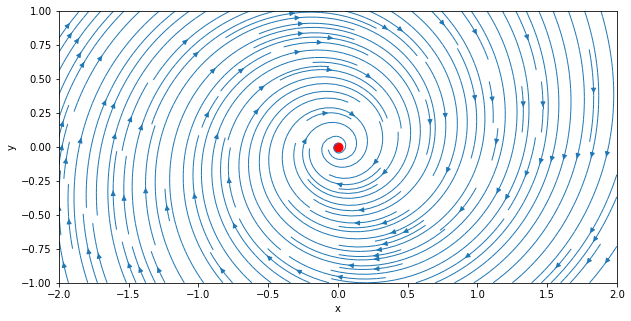

In [13]:
u_sink,v_sink = vel_profile_sink(sigma,x_sink,y_sink,X,Y)
psi_sink = streamfunc_sink(sigma,x_sink,y_sink,X,Y)

u = u_vortex+u_sink
v = v_vortex+v_sink
psi = psi_vortex+psi_sink

plt.figure(figsize = (width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u,v,density=2,linewidth=1)
plt.scatter(x_vortex,y_vortex,s=80,color='r')

## Infinite row of vorticies task

$$u\left(x,y\right) = + \frac{\Gamma}{2\pi} \sum_{i=1}^N \frac{y-y_i}{(x-x_i)^2+(y-y_i)^2}$$

$$v\left(x,y\right) = - \frac{\Gamma}{2\pi} \sum_{i=1}^N \frac{x-x_i}{(x-x_i)^2+(y-y_i)^2}$$

In [222]:
N = 50
x_start,x_end,y_start,y_end = -5.0,5.0,-1.0,1.0 
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

Nv = 101 #number of vorticies

#location of vortex centers, change the start and end of centers (outside of calculation domain) to make more infinite
away = 20
x_infv = np.linspace(x_start-away,x_end+away,Nv)

y_infv = np.zeros(Nv)
gamma_inf = 1.0

In [223]:
#Store velocity profile for each vortex center
def vel_profile_infinite(gamma,x,y,X,Y):
    
    u = gamma/(2*np.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    v = -gamma/(2*np.pi)*(X-x)/((X-x)**2+(Y-y)**2)
    
    return u,v

u_all = 0 #np.zeros((N,N), dtype=float)
v_all = 0 #np.zeros((N,N), dtype=float)

for i in range(Nv-1):
    u_each,v_each = vel_profile_infinite(gamma_inf,x_infv[i],y_infv[i],X,Y)
    u_all += u_each
    v_all += v_each
    

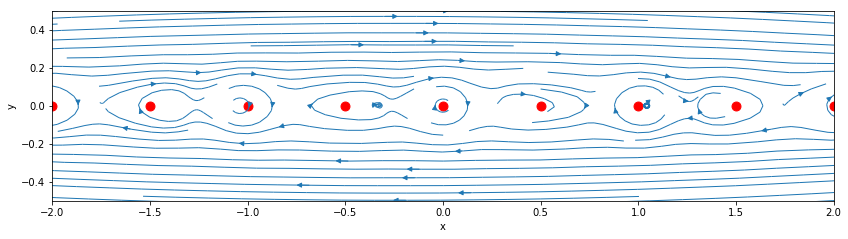

In [224]:
#Superposition
x_plot_start,x_plot_end,y_plot_start,y_plot_end = -2.0,2.0,-0.5,0.5

width = 14
height = (y_plot_end-y_plot_start)/(x_plot_end-x_plot_start)*width

plt.figure(figsize = (width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_plot_start,x_plot_end)
plt.ylim(y_plot_start,y_plot_end)
plt.streamplot(X,Y,u_all,v_all,density=2,linewidth=1)
plt.scatter([x_infv],[y_infv],s=80,color='r')

### Another way (Analytical Solution)

$$u\left(x,y\right) = +\frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$

$$v\left(x,y\right) = -\frac{\Gamma}{2a}\frac{\sin\left(\frac{2\pi x}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$

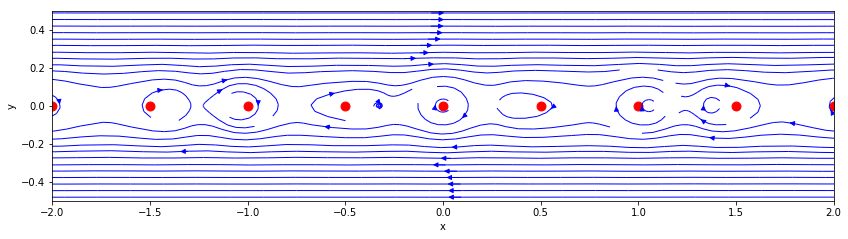

In [225]:
a = (x_end+away - (x_start-away))/Nv

u_infinite = gamma/(2*a)*np.sinh(2*np.pi*Y/a)/(np.cosh(2*np.pi*Y/a)-np.cos(2*np.pi*X/a))
v_infinite = - gamma/(2*a)*np.sin(2*np.pi*X/a)/(np.cosh(2*np.pi*Y/a)-np.cos(2*np.pi*X/a))

plt.figure(figsize = (width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_plot_start,x_plot_end)
plt.ylim(y_plot_start,y_plot_end)
plt.streamplot(X,Y,u_infinite,v_infinite,density=2,linewidth=1,color = 'b')
plt.scatter([x_infv],[y_infv],s=80,color='r')